In [47]:
import pandas as pd
import os
import glob
import cv2
import numpy as np
import imgaug.augmenters as iaa
from matplotlib import pyplot as plt
from pathlib import Path

In [67]:
IMG_PATH = '/home/daniel/dev/python/chest_x_ray/data/mooney/val/PNEUMONIA'

def load_imgs(imgpath):
    paths = list(Path(os.path.join(IMG_PATH)).glob('**/*'))
    loaded_imgs = []
    for p in paths:
        loaded_imgs.append(cv2.imread(str(p), cv2.IMREAD_GRAYSCALE))

    print(len(loaded_imgs))
    return loaded_imgs

def plot_img(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [68]:
imgs = load_imgs(IMG_PATH)
print(type(imgs[0]))

8
<class 'numpy.ndarray'>


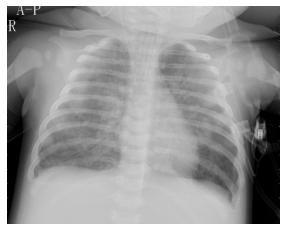

In [95]:
imindex = 3
plot_img(imgs[imindex])

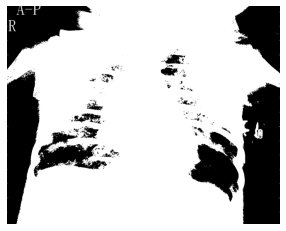

In [110]:
# Calculate mean and STD
mean, STD  = cv2.meanStdDev(imgs[imindex])

# Normalize to range
norm_image = cv2.normalize(imgs[imindex], imgs[imindex], 0, 255, norm_type=cv2.NORM_MINMAX)

# Clip frame to lower and upper STD
offset = 1
clipped = np.clip(norm_image, mean - offset*STD, mean + offset*STD).astype(np.uint8)

test_div = clipped / 255.0

plot_img(test_div)



# norm_image = cv2.normalize(imgs[0], None, alpha=0, beta=255, norm_type=cv2.NORM_L1)

In [108]:
norm_image 

array([[64, 61, 64, ..., 99, 99, 99],
       [65, 62, 64, ..., 97, 96, 95],
       [66, 64, 64, ..., 95, 93, 92],
       ...,
       [10, 16, 24, ...,  9,  6,  5],
       [10, 16, 24, ...,  8,  4,  2],
       [10, 16, 24, ...,  7,  3,  0]], dtype=uint8)

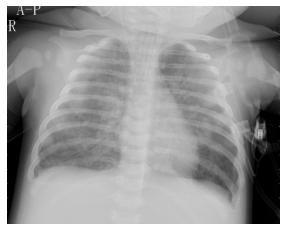

In [107]:
plot_img(norm_image)

In [100]:
# aug_clahe = iaa.CLAHE(clip_limit=(4), tile_grid_size_px=(2,2))
aug_hqeq = iaa.CLAHE(clip_limit=(0.2), tile_grid_size_px=(4,4))

def applyCLAHE(img):
    img = aug_hqeq.augment_image(img)
    return img

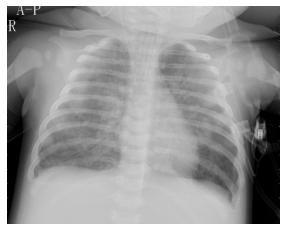

In [103]:
plot_img((imgs[imindex]))

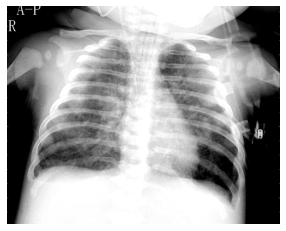

In [102]:
plot_img(applyCLAHE(norm_image))

In [111]:
applyCLAHE(norm_image)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

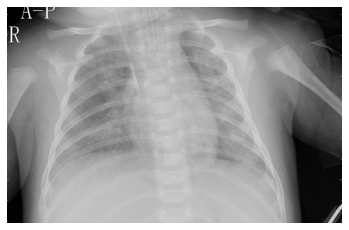

In [10]:
plot_img(applyCLAHE(norm_image))

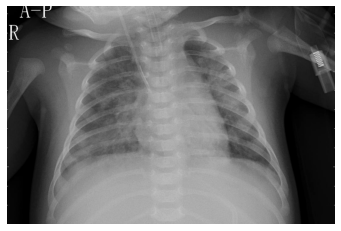

In [11]:
plot_img(applyCLAHE(imgs[2]))

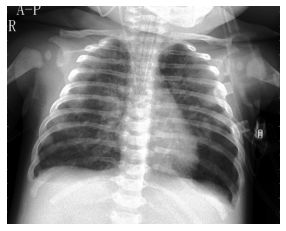

In [161]:
plot_img(applyCLAHE(imgs[3]))
